In [61]:
import tensorflow as tf

from keras.layers import Dense, Input, Activation
from keras import Model
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# INPUT DATA 
X = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32); # input signals for x and y
Y = tf.constant([[0], [1], [1], [1]], dtype=tf.float32) # truth table for OR
Y1 = tf.constant([[0],[1],[1],[0]], dtype=tf.float32) # truth table for XOR


In [63]:
# создание нейросети (один скрытый слой)

def createModel(input_shape):
    input_x = Input(shape = input_shape)
    z = Dense(1)(input_x) # 1 нейрон и передача входного сигнала input_x
    p = Activation('sigmoid')(z) # neuron's output (z) is transefered to the act.func
    return Model(inputs = input_x, outputs = p ) # создаём и возвращаем модель 

In [64]:
# training and testing

def trainModel(X,Y1):
    model = createModel((2))
    model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics='accuracy') # configuring model (optimizer, errorfunc, metics)
    model.summary() # model info
    model.fit(x=X,y=Y,epochs=5000) # training params. (inputs:X,Y,epochs.numb)
    return model

def testModel(X_test, model):
  result = model.predict(X_test) # вызывается метод предсказания для входных тестовых данных
  # Задаётся решающее правило.
  if(result >= 0.5): # если выходная вероятность предсказания больше или равно 0.5 то возвращаем класс 1
    return 1
  elif(result < 0.5): # если выходная вероятность предсказания меньше 0.5 то возвращаем класс 0
    return 0


In [65]:
model = trainModel(X,Y1)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
 activation_9 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5000
1/1 [==============================] - 1s 893ms/step - loss: 0.9886 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.9876 - accuracy: 0.2500
Epoch 3/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.9866 - accuracy: 0.2500
Epoch 4/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.9856 - accuracy: 0.2500
Epoch 5/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.9845 - accuracy: 0.2500
Epoch 6/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.9835 - accuracy: 0.2500
Epoch 7/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.9825 - accuracy: 0.2500
Epoch 8/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.9815 - accuracy: 0.2500
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.9805 - accuracy: 0.2500
Epoch 10/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.9794 - accuracy: 0.2500
Epoch 11/5000
1/

In [66]:
testModel([[1, 0]], model)

1/1 [==============================] - 0s 145ms/step


1

In [67]:
def sigmoid(input):
  return 1 / (1 + np.exp(-input))

def tanh(input):
  return (np.exp(2*input) - 1) / (np.exp(2*input) + 1)

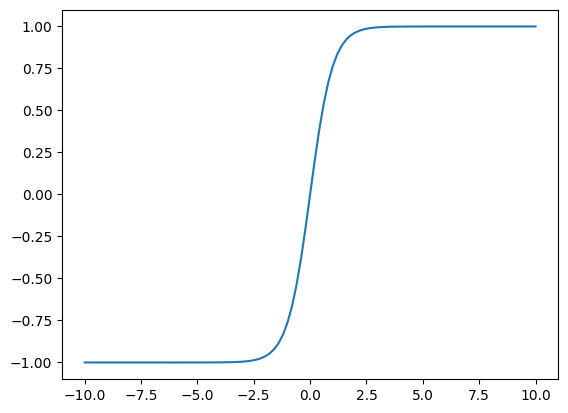

In [68]:
act_x = np.linspace(-10, 10, 101) # generating 101 numbers from -10 to 10
act_y = [tanh(x) for x in act_x] # tanh(x) calculation in every point in act_x
plt.plot(act_x, act_y) # act.func activation
plt.show() 

In [69]:
def plot_decision_boundary(model, X, y):

 # границы и сетка
  X = X.numpy()
  y = y.numpy()
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx1, xx2 = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

  # Создаются входные сигналы X (мы собираемся предсказывать значения по всей сетке рассматриваемого пространства)
  x_in = np.c_[xx1.ravel(), xx2.ravel()] 

  # Осуществляется предсказание для входных сигналов X
  y_pred = model.predict(x_in)

  # Проверка на то, является наша задача многоклассовой или бинарной классификацией
  if model.output_shape[-1] > 1: # для этого проверяется последняя размерность output_shape модели
    print("Multiclass classification...")
    y_pred = np.argmax(y_pred, axis=-1).reshape(xx1.shape) # reshape необходим поскольку результатом будет 1D вектор, а необходим 2D, как у xx1
  else:
    print("Binary Classifcation...")
    y_pred = np.round(np.max(y_pred, axis=-1)).reshape(xx1.shape) # reshape необходим поскольку результатом будет 1D вектор, а необходим 2D, как у xx1

  # Визуализация границ решения
  plt.figure(figsize=(7, 7))
  plt.contourf(xx1, xx2, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlabel("x1")
  plt.ylabel("x2")

7813/7813 [==============================] - 13s 2ms/step
Binary Classifcation...


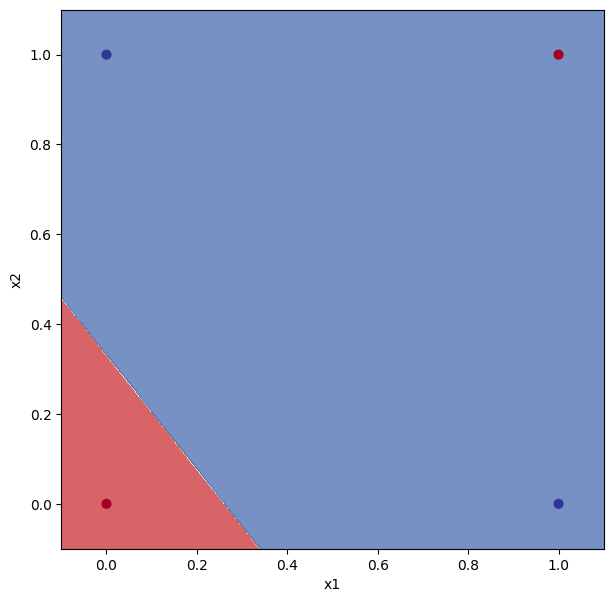

In [72]:
plot_decision_boundary(model, X, Y1)